# ANA 680 Assignment 2: K-Nearest Neighbors Model
## Kirsten Mattingly
### February 5, 2025
#### GitHub Link: https://github.com/kmattingly8/ANA680.git

In [2]:
# Import Breast Cancer Dataset
import pandas as pd
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_original.data.features 
y = breast_cancer_wisconsin_original.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_original.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_original.variables) 

{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

In [3]:
# Explore dataset

X.shape

(699, 9)

In [4]:
y.shape

(699, 1)

In [5]:
X.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
Clump_thickness,5.0,5.0,3.0,6.0,4.0,8.0,1.0,2.0,2.0,4.0
Uniformity_of_cell_size,1.0,4.0,1.0,8.0,1.0,10.0,1.0,1.0,1.0,2.0
Uniformity_of_cell_shape,1.0,4.0,1.0,8.0,1.0,10.0,1.0,2.0,1.0,1.0
Marginal_adhesion,1.0,5.0,1.0,1.0,3.0,8.0,1.0,1.0,1.0,1.0
Single_epithelial_cell_size,2.0,7.0,2.0,3.0,2.0,7.0,2.0,2.0,2.0,2.0
Bare_nuclei,1.0,10.0,2.0,4.0,1.0,10.0,10.0,1.0,1.0,1.0
Bland_chromatin,3.0,3.0,3.0,3.0,3.0,9.0,3.0,3.0,1.0,2.0
Normal_nucleoli,1.0,2.0,1.0,7.0,1.0,7.0,1.0,1.0,1.0,1.0
Mitoses,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0


In [6]:
y.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
Class,2,2,2,2,2,4,2,2,2,2


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  683 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 49.3 KB


In [8]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Class   699 non-null    int64
dtypes: int64(1)
memory usage: 5.6 KB


In [9]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity_of_cell_size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Uniformity_of_cell_shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Single_epithelial_cell_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Bare_nuclei,683.0,3.544656,3.643857,1.0,1.0,1.0,6.0,10.0
Bland_chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Normal_nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0


In [10]:
y.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


In [11]:
y.nunique()

Class    2
dtype: int64

From datset description: Each row describes one patient, and the class column describes if the patient tumor is benign (label = 2) or malignant (label = 4). 

In [12]:
# Find Missing Values
X.isnull().sum()

Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
dtype: int64

In [13]:
# Examine records that have missing values for Bare_nuclei

import numpy as np

X[np.isnan(X['Bare_nuclei'])].transpose()

,23,40,139,145,158,164,235,249,275,292,294,297,315,321,411,617
Clump_thickness,8.0,6.0,1.0,1.0,1.0,5.0,3.0,3.0,3.0,8.0,1.0,5.0,4.0,3.0,1.0,1.0
Uniformity_of_cell_size,4.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,1.0,4.0,6.0,1.0,1.0,1.0
Uniformity_of_cell_shape,5.0,6.0,1.0,3.0,2.0,1.0,4.0,1.0,3.0,8.0,1.0,3.0,5.0,1.0,1.0,1.0
Marginal_adhesion,1.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.0,1.0,1.0,1.0
Single_epithelial_cell_size,2.0,6.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,2.0,1.0,1.0
Bare_nuclei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bland_chromatin,7.0,7.0,2.0,2.0,1.0,3.0,3.0,3.0,2.0,6.0,2.0,2.0,4.0,3.0,2.0,1.0
Normal_nucleoli,3.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0,1.0,3.0,9.0,1.0,1.0,1.0
Mitoses,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Don't see any glaring patterns that link all these records with missing values of 'Bare_nuclei'. We can use the median value of 'Bare_nuclei' to impute and fill these missing values.

In [14]:
# Impute missing values with the median value of the 'Bare_nuclei' column

median_value = X['Bare_nuclei'].median()
X['Bare_nuclei'].fillna(median_value, inplace=True)

/var/folders/rb/hbq90lbj0m705wt5bbtwzdl40000gn/T/ipykernel_24037/3162709268.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Bare_nuclei'].fillna(median_value, inplace=True)
/var/folders/rb/hbq90lbj0m705wt5bbtwzdl40000gn/T/ipykernel_24037/3162709268.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Bare_nuclei'].fillna(median_value,

In [15]:
# Check to make sure imputation worked

X.isnull().sum()

Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    0
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
dtype: int64

No more missing values!

In [16]:
# Find Missing Values in Target Variable
y.isnull().sum()

Class    0
dtype: int64

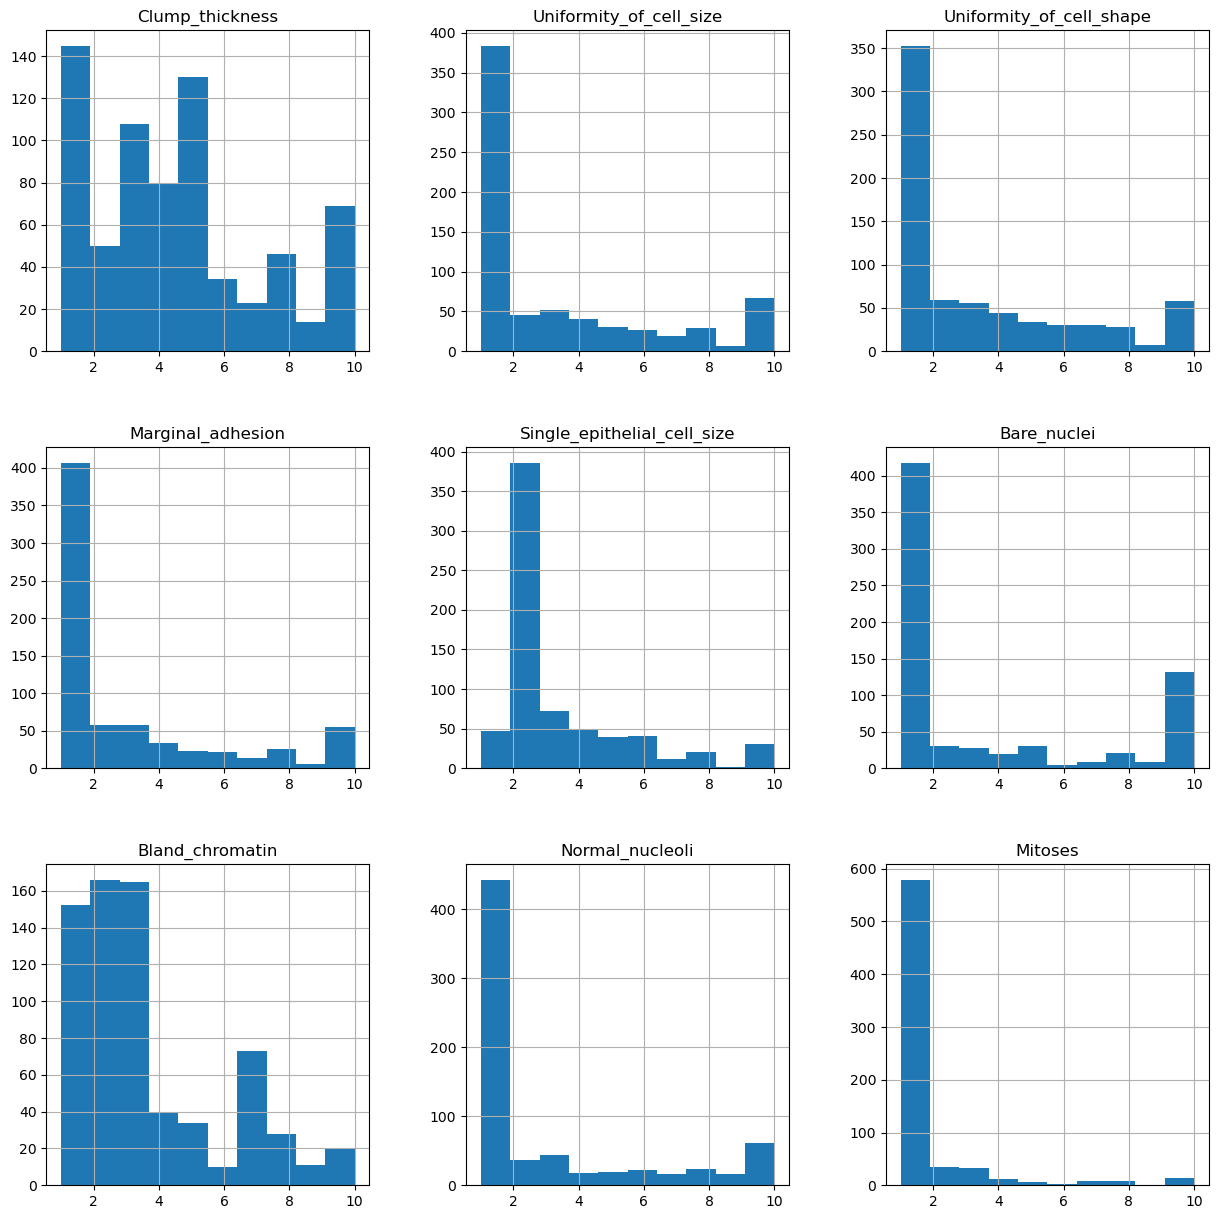

In [17]:
# Plot Histograms to Examine Feature Distributions
X.hist(bins=10, figsize=(15, 15));

/var/folders/rb/hbq90lbj0m705wt5bbtwzdl40000gn/T/ipykernel_24037/1357205957.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(level, rotation=0);


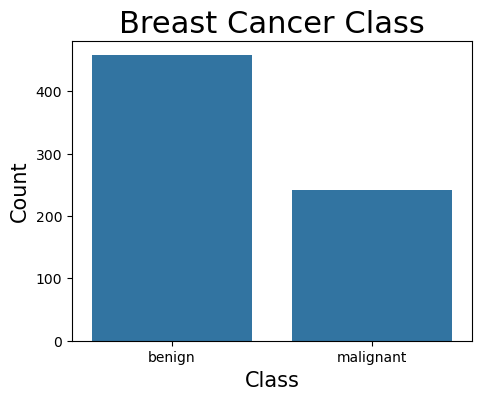

In [18]:
# Visualization of Target Variable: Breast Cancer Class

import matplotlib.pyplot as plt
import seaborn as sns


level = ['benign', 'malignant']

fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = y, x ='Class')
plt.title('Breast Cancer Class', fontsize=22)
ax.set_xlabel("Class", fontsize=15)
ax.set_ylabel("Count", fontsize=15)
ax.set_xticklabels(level, rotation=0);

In [19]:
# Convert Target Variable dataset from a 2D array (column vector) to a 1D array (vector).

y = y['Class'].values

In [20]:
# Split the Data into Training and Testing Sets to Build Model

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.25, random_state = 88)

print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

X_train.shape:  (524, 9)
y_train.shape:  (524,)
X_test.shape:  (175, 9)
y_test.shape:  (175,)


In [21]:
# Train a KNN Model to Predict Breast Cancer Class

from sklearn.neighbors import KNeighborsClassifier

# Initialize the Model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the Model
knn.fit(X_train, y_train)

# Use Model to Make Predictions on Test Set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"KNN Accuracy: {accuracy}")
print(f"KNN Confusion Matrix:\n{conf_matrix}")

KNN Accuracy: 0.9714285714285714
KNN Confusion Matrix:
[[106   2]
 [  3  64]]


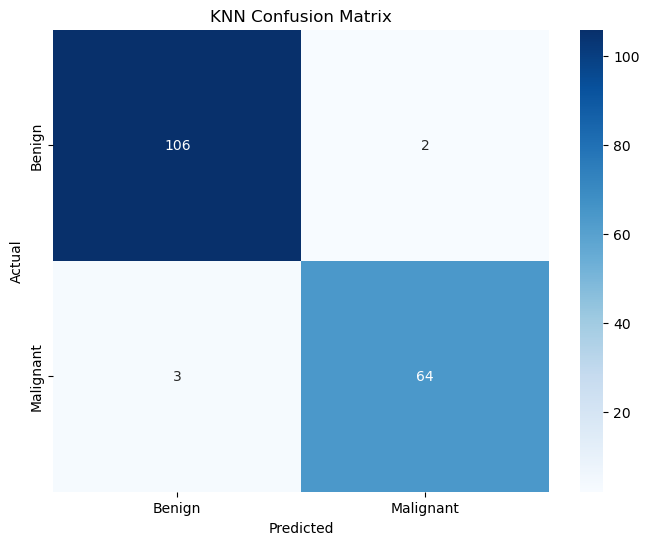


KNN Classification Report: 
              precision    recall  f1-score   support

           2       0.97      0.98      0.98       108
           4       0.97      0.96      0.96        67

    accuracy                           0.97       175
   macro avg       0.97      0.97      0.97       175
weighted avg       0.97      0.97      0.97       175



In [22]:
from sklearn.metrics import confusion_matrix, classification_report

# Illustrated Confusion Matrix 
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nKNN Classification Report: ")
print(class_report)